C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


        Month  Forecasted_Sales     Lower_CI      Upper_CI
0  2025-02-01       7356.249613  6079.538550   8632.960676
1  2025-03-01       8834.958662  7296.990348  10372.926976
2  2025-04-01       7389.285041  5590.522431   9188.047651
3  2025-05-01       7354.417176  5334.624355   9374.209998
4  2025-06-01       7616.123953  5396.208734   9836.039172
5  2025-07-01       7922.069290  5518.806941  10325.331640
6  2025-08-01       7568.083704  4994.474523  10141.692885
7  2025-09-01       7751.886499  5018.531102  10485.241896
8  2025-10-01       8209.387547  5325.119202  11093.655891
9  2025-11-01       8142.430066  5114.761447  11170.098685
10 2025-12-01       7900.555927  4735.982183  11065.129672
11 2026-01-01       8071.388964  4775.549324  11367.228604
12 2026-02-01       8087.113868  4451.810938  11722.416799
13 2026-03-01       9541.574279  5669.595301  13413.553257
14 2026-04-01       8193.208276  4086.519887  12299.896664
15 2026-05-01       8269.025929  3942.953279  12595.0985

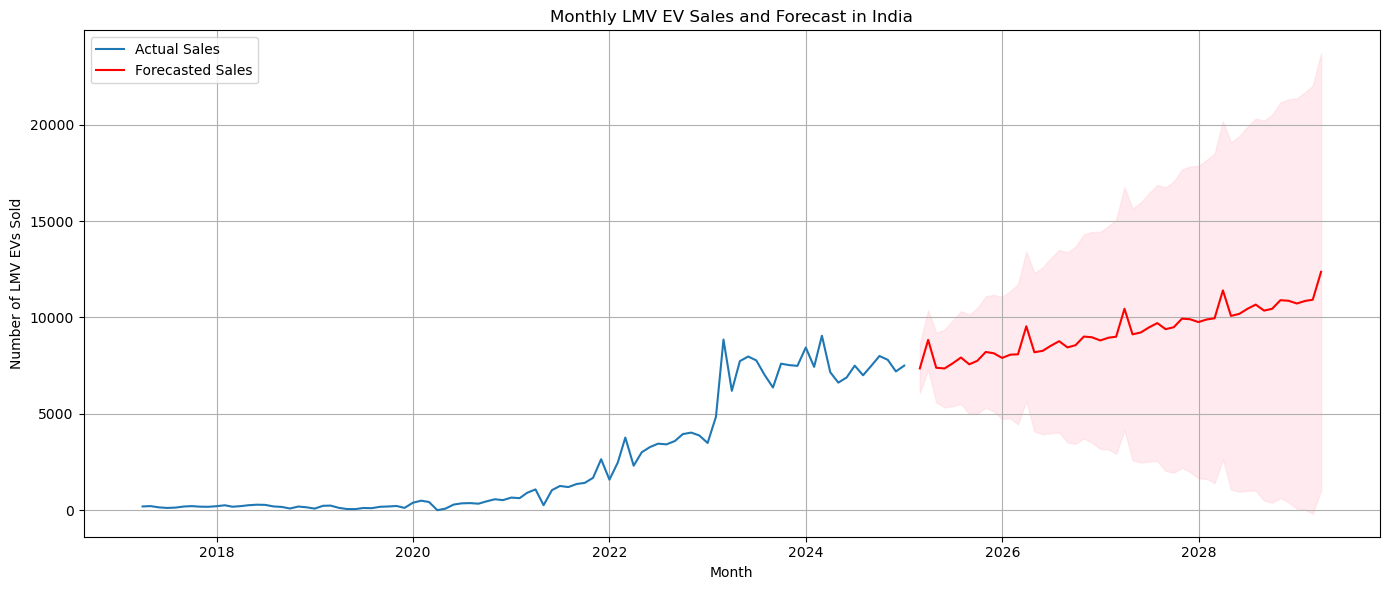

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data from Excel
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0,3])  # Assuming column 0 = Month, column 3 = LMV

# Clean column names
df.columns = ['Month', 'EV_Sales']

# Remove commas and convert to integer
df['EV_Sales'] = df['EV_Sales'].astype(str).str.replace(',', '').astype(int)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Fit SARIMA model — using seasonal_order with period=12 (monthly seasonality)
sarima_model = SARIMAX(df['EV_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))


sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months (or adjust steps)
forecast_steps = 50
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Forecast index starts after the last known month
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create forecast DataFrame
# Display forecast table
forecast_df = pd.DataFrame({
    'Month': forecast_values.index,
    'Forecasted_Sales': forecast_values.values,
    'Lower_CI': forecast_conf_int.iloc[:, 0].values,
    'Upper_CI': forecast_conf_int.iloc[:, 1].values
})
print(forecast_df)

# Plot actual vs forecasted
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['EV_Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly LMV EV Sales and Forecast in India')
plt.xlabel('Month')
plt.ylabel('Number of LMV EVs Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()